<a href="https://colab.research.google.com/github/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis/blob/main/02-getting-data/02_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "lxml>=3.7" "nltk>=3.2" "beautifulsoup4>=4.6" "pypdf2>=1.26" "networkx>=2.8" "scipy<2,>=0.18" "scikit-learn>=0.19" "xlrd<2,>=1.0" "mpl-axes-aligner<2,>=1.1"

In [ ]:
!git clone https://github.com/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis
%cd Foundations-of-Cultural-and-Social-Data-Analysis/02-getting-data
!ls

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
import lxml.etree
import json

In [26]:
NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}


def character_network(tree):
    """Construct a character interaction network.

    Construct a character interaction network for Shakespeare texts in
    the Folger Digital Texts collection. Character interaction networks
    are constructed on the basis of successive speaker turns in the texts,
    and edges between speakers are created when their utterances follow
    one another.

    Arguments:
        tree: An lxml.ElementTree instance representing one of the XML
            files in the Folger Shakespeare collection.

    Returns:
        A character interaction network represented as a weighted,
        undirected NetworkX Graph.

    """
    G = nx.Graph()
    # extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei:div2[@type="scene"]', NSMAP):
        speakers = scene.findall('.//tei:sp', NSMAP)
        # iterate over the sequence of speaker turns...
        for i in range(len(speakers) - 1):
            # ... and extract pairs of adjacent speakers
            try:
                speaker_i = speakers[i].attrib['who'].split('_')[0].replace('#', '')
                speaker_j = speakers[i + 1].attrib['who'].split('_')[0].replace('#', '')
                # if the interaction between two speakers has already
                # been attested, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # else add an edge between speaker i and j to the graph
                else:
                    G.add_edge(speaker_i, speaker_j, weight=1)
            except KeyError:
                continue
    return G

# Easy

1. The Dutch writer Joost van den Vondel is often seen as one of the most important Dutch playwrights of the seventeenth century. The file data/vondel-stcn.csv consists of 335 bibliographic records of his work as recorded by the Short-Title Catalogue, Netherlands (STCN). Use Python's csv module to read this file into a list of records. Each record, then, should be a list with four elements: (i) the year of publication, (ii) the title, (iii) the name of the author, and (iv) the name of the publisher.

In [27]:
# find the CSV file.
csv_file = 'data/vondel-stcn.csv'

# Open the CSV file
with open(csv_file) as stream:
    # call stream.readlines() to read all lines in the CSV file as a list.
    lines = stream.readlines()
    
# Print the first three lines of the CSV file 
print(lines[:3])

['year,title,author,publisher\n', '1642,Hiervsalem verwoest. Trevrspel.,Joost van den Vondel 1587-1679,"Matthijsz, Paulus Amsterdam"\n', '1641,"Gysbrecht van Aemstel, d\'ondergangh van zijn stad en zijn ballingschap. Treurspel.",Joost van den Vondel 1587-1679,"Houthaeck, Dirck Cornelisz Amsterdam"\n']


In [28]:
entries = []

# Open the file and iterate over each line in the file.
for line in open(csv_file):
    entries.append(line.strip().split(',')) # Remove whitespace characters and split the line into a list at each comma.

# Print the first three entries
for entry in entries[:3]:
    print(entry)

['year', 'title', 'author', 'publisher']
['1642', 'Hiervsalem verwoest. Trevrspel.', 'Joost van den Vondel 1587-1679', '"Matthijsz', ' Paulus Amsterdam"']
['1641', '"Gysbrecht van Aemstel', ' d\'ondergangh van zijn stad en zijn ballingschap. Treurspel."', 'Joost van den Vondel 1587-1679', '"Houthaeck', ' Dirck Cornelisz Amsterdam"']


2. Use the Counter object from the collections module to construct a frequency distribution of Vondel's publishers. Print the five most common publishers.

In [29]:
import csv
import collections


entries = []
# Open the CSV file and read it using DictReader
with open(csv_file) as stream:
    reader = csv.DictReader(stream)
    
    # Create a Counter to track the frequency of each publisher.
    publishers = collections.Counter()
    
    #Iterate
    for entry in reader:
        publishers[entry['publisher']] += 1 
        
# display the five most common publishers
publishers.most_common(5)

[('Wees, Abraham de I, wed. Amsterdam', 34),
 ('Wees, Joannes de Amsterdam', 29),
 ('Oosterwyk, Johannes van Amsterdam', 28),
 ('Brakman, Pieter Amersfoort', 23),
 ('Bruyn, Cornelis de Amsterdam', 21)]

3. The place name of publication of Vondel's works is included in the publisher name. For this exercise you may assume that the place name is the last word of the string. Write a procedure to extract all place names, and store those in a list. Use the Counter object to construct a frequency distribution and print the five most common place names.

In [30]:
place_names = []

# Open the CSV file and read it using DictReader
with open(csv_file) as stream:
    reader = csv.DictReader(stream)
    
    #Iterate
    for entry in reader:
        place_name = entry['publisher'].split()[-1] # Extract the last word from the publisher string as the place name
        place_names.append(place_name)

# Count the frequency of each place name
place_name_counter = collections.Counter(place_names)

# Display the five most common place names
place_name_counter.most_common(5)

[('Amsterdam', 259),
 ('Amersfoort', 23),
 ('stated', 20),
 ('Köln', 10),
 ('Schiedam', 4)]

# Moderate

1. In this exercise, we'll ask you to create and draw a character network for Shakespeare's Romeo and Juliet and Othello. The XML encoded plays can be found at data/folger/xml/Rom.xml and data/folger/xml/Oth.xml. Compare the two visualizations to that of Hamlet. Comment on any differences you observe.

In [31]:
# Parse the XML file containing data for "Romeo and Juliet"
tree_rom = lxml.etree.parse('data/folger/xml/Rom.xml')
# Create a character network from the XML tree root
G_rom = character_network(tree_rom.getroot())

In [32]:
import collections

interactions_rom = collections.Counter()

# Iterate through all the edges in the graph G_rom
for speaker_i, speaker_j, data in G_rom.edges(data=True):
    interaction_count = data['weight']
    interactions_rom[speaker_i] += interaction_count
    interactions_rom[speaker_j] += interaction_count
    
# Create a list of node sizes for a plot
nodesizes_rom = [interactions_rom[speaker] * 5 for speaker in G_rom]

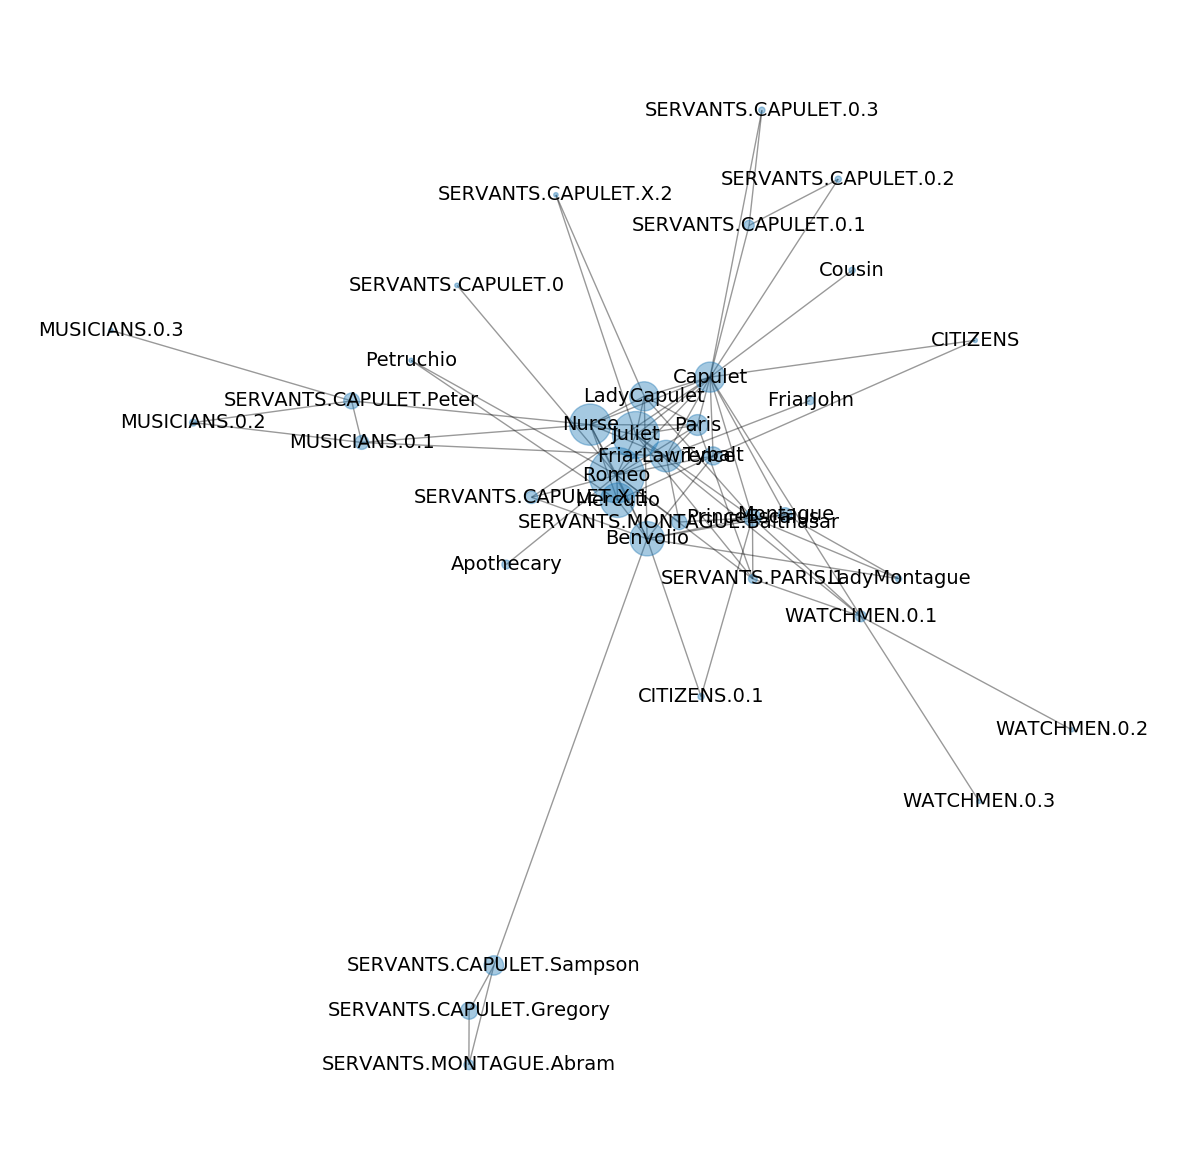

In [33]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G_rom, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G_rom, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G_rom, pos, node_size=nodesizes_rom, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G_rom, pos, font_size=14)
plt.axis('off');


In [34]:
# Parse the XML file containing data for "Othello"
tree_Oth = lxml.etree.parse('data/folger/xml/Oth.xml')
# Create a character network from the XML tree root
G_Oth = character_network(tree_Oth.getroot())

In [35]:
interactions_Oth = collections.Counter()

# Iterate through all the edges in the graph G_Oth
for speaker_i, speaker_j, data in G_Oth.edges(data=True):
    interaction_count = data['weight']
    interactions_Oth[speaker_i] += interaction_count
    interactions_Oth[speaker_j] += interaction_count

nodesizes_Oth = [interactions_Oth[speaker] * 5 for speaker in G_Oth]

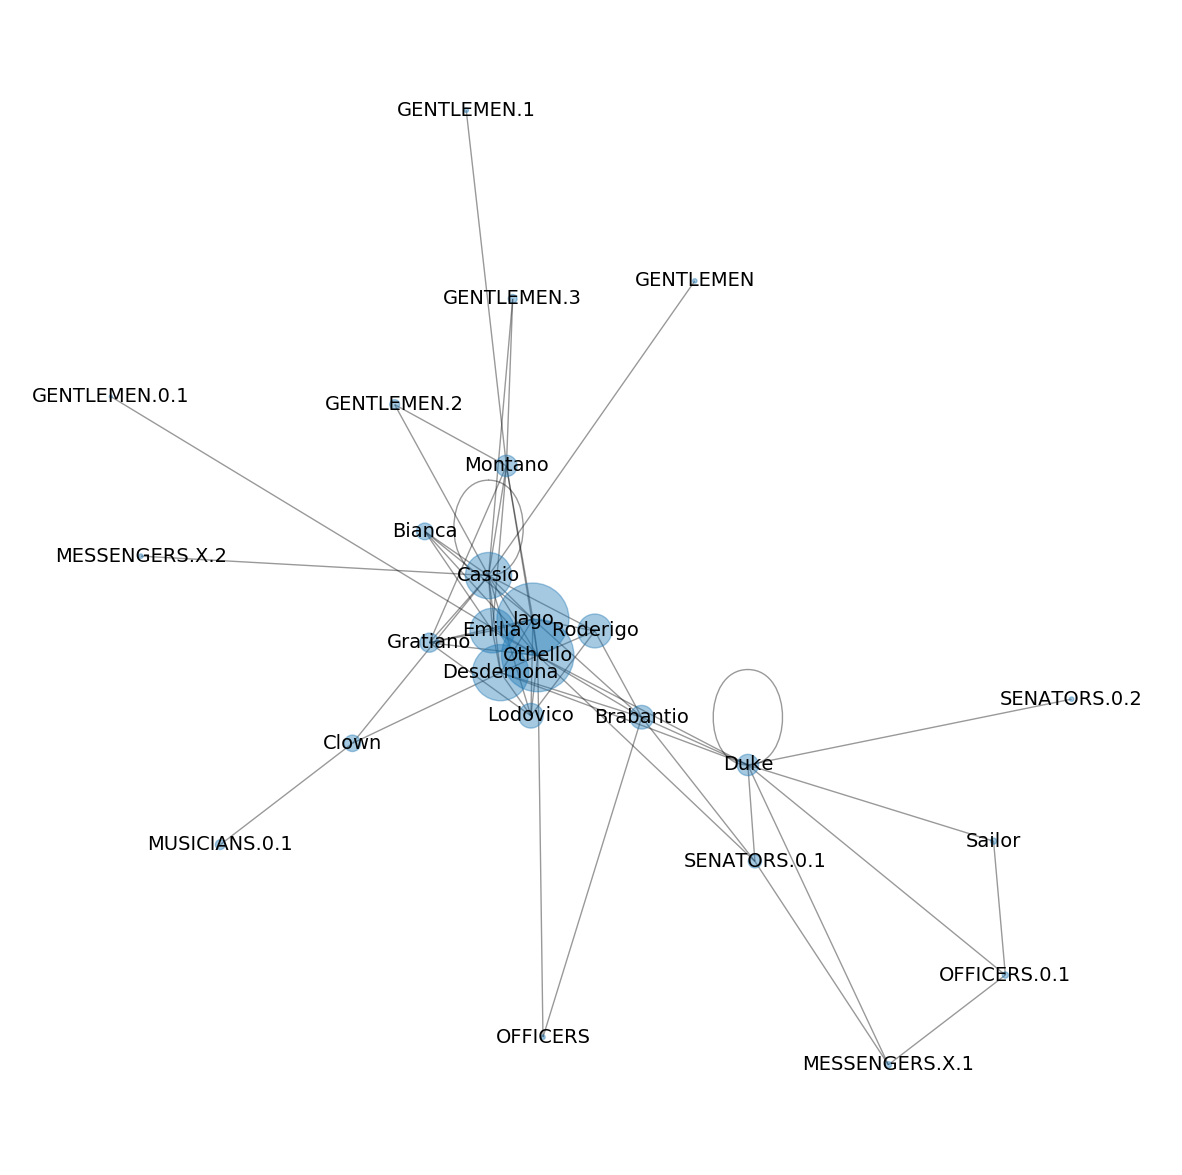

In [36]:
# Create an empty figure of size 15x15
fig = plt.figure(figsize=(15, 15))
# Compute the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G_Oth, k=0.5, iterations=200)
# Then, add the edges to the visualization
nx.draw_networkx_edges(G_Oth, pos, alpha=0.4)
# Subsequently, add the weighted nodes to the visualization
nx.draw_networkx_nodes(G_Oth, pos, node_size=nodesizes_Oth, alpha=0.4)
# Finally, add the labels (i.e. the speaker IDs) to the visualization
nx.draw_networkx_labels(G_Oth, pos, font_size=14)
plt.axis('off');

### Refelction:

2. Print the number of nodes and edges for each of the three networks (i.e., including the graph for Hamlet). Which network has the largest number of nodes? And which has the largest number of edges?

In [37]:
# Parse the XML file containing data for "Hamlet"
tree = lxml.etree.parse('data/folger/xml/Ham.xml')
# Create a character network from the XML tree root
G = character_network(tree.getroot())

In [38]:
# Print the number of nodes and edges in the network graph for "Hamlet", "Romeo and Juliet" and "Othello".

print(f"Netwrok of Hamelt with {len(G.nodes())} nodes and {len(G.edges())} edges.")
print(f"Network of Romeo and Juliet with {len(G_rom.nodes())} nodes and {len(G_rom.edges())} edges.")
print(f"Netwrok of Othello with {len(G_Oth.nodes())} nodes and {len(G_Oth.edges())} edges.")

Netwrok of Hamelt with 38 nodes and 73 edges.
Network of Romeo and Juliet with 37 nodes and 83 edges.
Netwrok of Othello with 26 nodes and 64 edges.


### Refelction:

3. The character network of Hamlet has 38 nodes and 73 edges. However, many other edges between nodes could exist. That is to say, Shakespeare could have chosen to have other and more characters interact with each other. The extent to which this potential is used is called the density of a network. Network density is computed as the number of realized edges divided by the number of potential edges. NetworkX provides the function nx.density() to compute the density of a network. Use this function to compute the density of the three character networks. Which network has the highest density? How do the density values compare to the three visualizations?

In [39]:
# Print the network density for the plays "Hamlet", "Romeo and Juliet", and "Othello".

print(f"The density of the network of Hamlet is {nx.density(G)}.") 
print(f"The density of the network of Romeo and Juliet is {nx.density(G_rom)}.") 
print(f"The density of the network of Othello is {nx.density(G_Oth)}.") 

The density of the network of Hamlet is 0.10384068278805121.
The density of the network of Romeo and Juliet is 0.12462462462462462.
The density of the network of Othello is 0.19692307692307692.


### Reflection:

# Challenging

1. In network theory, a number of mathematical concepts are commonly used to characterize the status, behavior or overall importance of an individual node in a network. The "degree" of a node is an easy one, as it simply refers to the total number of edges which a node participates in (in an undirectional graph). Look up the documentation for this function in NetworkX online, and calculate for each text (i.e., Romeo and Juliet, Othello, and Hamlet) the three character nodes with the highest degrees. Do the results rank the titular protagonist highest in each play?

In [40]:
# Hamlet

# Calculate the degrees of all nodes in the Hamlet character network graph.
node_degrees_ham = list(nx.degree(G))
# Sort the nodes based on their degree in descending order and select the top three.
top_three_nodes = sorted(node_degrees_ham, key=lambda x: x[1], reverse=True)[:3]
# Print the names and degrees of the top three characters 
print(f"Top three characters in Hamlet {top_three_nodes}.") 


# Romeo and Juliet

node_degrees_rom = list(nx.degree(G_rom))
top_three_nodes = sorted(node_degrees_rom, key=lambda x: x[1], reverse=True)[:3]
print(f"Top three characters in Romeo and Juliet {top_three_nodes}.") 

# Othello
node_degrees_oth = list(nx.degree(G_Oth))
top_three_nodes = sorted(node_degrees_oth, key=lambda x: x[1], reverse=True)[:3]
print(f"Top three characters in Romeo and Juliet {top_three_nodes}.") 

Top three characters in Hamlet [('Hamlet', 23), ('Claudius', 13), ('Horatio', 12)].
Top three characters in Romeo and Juliet [('Capulet', 16), ('Romeo', 14), ('Benvolio', 11)].
Top three characters in Romeo and Juliet [('Cassio', 16), ('Othello', 14), ('Iago', 10)].


Refrences:
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html
2. https://stackoverflow.com/questions/10695139/sort-a-list-of-tuples-by-2nd-item-integer-value

1(b). More challenging version: the degree measure also has a "weighted" variant, which does not only inspect the number of edges but also their strength. Implement this variant and find out whether this changes the picture at all.

In [41]:
#WEIGHTED
# Hamlet

# Calculate the weighted degrees of all nodes in the Hamlet character network graph.
node_degrees_ham = list(nx.degree(G, weight='weight'))
# Sort the nodes based on their weighted degree in descending order and select the top three.
top_three_nodes = sorted(node_degrees_ham, key=lambda x: x[1], reverse=True)[:3]
# Print the names and weighted degrees of the top three characters
print(f"Top three characters in Hamlet (weighted) {top_three_nodes}.") 


# Romeo and Juliet
node_degrees_rom = list(nx.degree(G_rom, weight='weight'))
top_three_nodes = sorted(node_degrees_rom, key=lambda x: x[1], reverse=True)[:3]
print(f"Top three characters in Romeo and Juliet (weighted)  {top_three_nodes}.") 

# Othello
node_degrees_oth = list(nx.degree(G_Oth, weight='weight'))
top_three_nodes = sorted(node_degrees_oth, key=lambda x: x[1], reverse=True)[:3]
print(f"Top three characters in Romeo and Juliet (weighted)  {top_three_nodes}.") 

Top three characters in Hamlet (weighted) [('Hamlet', 704), ('Horatio', 230), ('Claudius', 189)].
Top three characters in Romeo and Juliet (weighted)  [('Romeo', 318), ('Juliet', 227), ('Nurse', 176)].
Top three characters in Romeo and Juliet (weighted)  [('Othello', 544), ('Iago', 537), ('Desdemona', 327)].


Refrences:
https://stackoverflow.com/questions/27878034/networkx-get-degree-of-node-with-weights-applied

2. The Van Gogh letters project has digitally encoded all surviving letters written and received by Vincent van Gogh (1853--1890). All letters have been encoded in XML following the TEI guidelines. The complete corpus of letters can be found in the folder data/vangoghxml. In this exercise, you need to use the lxml module to load and parse one of the letters. The XML encoded letters specify two namespaces at the root level. Thus, to easily extract certain tags, we want to specify a namespace map, which consists of keys and values for both namespaces. The namespace map you should use is:

In [42]:
# Namespace map based on the namespaces used in the XML files
NSMAP = {
    'tei': 'http://www.tei-c.org/ns/1.0',
    'vg': 'http://www.vangoghletters.org/ns/' # copied from <TEI> of let001.xml
}

# Load and parse the XML file
tree = lxml.etree.parse('data/vangoghxml/let001.xml')

print(f"Author: {tree.getroot().find('.//tei:author', namespaces=NSMAP).text}")
print(f"Addressee: {tree.getroot().find('.//vg:addressee', namespaces=NSMAP).text}")

Author: Vincent van Gogh
Addressee: Theo van Gogh


### Reflection 

3. There are 929 Van Gogh letters in total. In this exercise, you will need to extract the author and addressee of all letters. To do that, you will need to write a for-loop, which iterates over all XML files in data/vangoghxml. There are various ways to loop over all files in directory, but a very convenient way is to use the os.scandir() function in Python's os module. Make two lists, authors and addressees, in which you store the author and addressee of each letter. 

In [44]:
import os

folder= 'data/vangoghxml'

# Initialize lists to store authors and addressees
authors = []
addressees = []

# Use os.scandir() to iterate over all files
with os.scandir(folder) as entries:
    for entry in entries:
        if entry.is_file() and entry.name.startswith('let'):
            # Parse the XML file
            tree = lxml.etree.parse(entry.path)
            # Use iterfind to search for  author
            for author in tree.iterfind('.//tei:author', namespaces=NSMAP):
                # Check if the author has text and append it to the authors list
                if author.text:
                    authors.append(author.text)
                else:
                    authors.append('Unknown Author')
                    
            # Use iterfind to search for addressee
            for addressee in tree.iterfind('.//vg:addressee', namespaces=NSMAP):
                # Check if the addressee has text and append it to the addressees list
                if addressee.text:
                    addressees.append(addressee.text)
                else:
                    addressees.append('Unknown Addressee')

In [46]:
import pandas as pd

# Create a DataFrame
letters_df = pd.DataFrame({
    'Author': authors,
    'Addressee': addressees
})

# display the DataFrame
letters_df

,Author,Addressee
0,Vincent van Gogh,Emile Bernard
1,Theo van Gogh and Jo van Gogh-Bonger,Vincent van Gogh
2,Vincent van Gogh,Emile Bernard
3,Vincent van Gogh,Theo van Gogh and Jo van Gogh-Bonger
4,Theo van Gogh,Vincent van Gogh
...,...,...
898,Paul Gauguin,Vincent van Gogh
899,Vincent van Gogh,Willemien van Gogh
900,Jo van Gogh-Bonger,Vincent van Gogh
901,Vincent van Gogh,Joseph Ginoux


In [47]:
from collections import Counter
# How many letters were written by Vincent Van Gogh?
letters_written_by_vg = letters_df[letters_df['Author'] == 'Vincent van Gogh'].shape[0]

# How many letters did Vincent Van Gogh receive?
letters_received_by_vg = letters_df[letters_df['Addressee'] == 'Vincent van Gogh'].shape[0]

# Most common recipients of Vincent's letters
vg_letters = letters_df[letters_df['Author'] == 'Vincent van Gogh']

# Extract the list of addressees
recipients = vg_letters['Addressee']

# Use counter to count the number of occurrences of each recipient.
recipient_count = Counter(recipients)

# Retrieve the most common recipient(s)
most_common_recipients = recipient_count.most_common(5)


print(f"Letters written by Vincent van Gogh: {letters_written_by_vg}")
print(f"Letters received by Vincent van Gogh: {letters_received_by_vg}")
print(f"Most frequent addressee by Vincent van Gogh: {most_common_recipients}")

Letters written by Vincent van Gogh: 820
Letters received by Vincent van Gogh: 83
Most frequent addressee by Vincent van Gogh: [('Theo van Gogh', 651), ('Anthon van Rappard', 58), ('Emile Bernard', 22), ('Willemien van Gogh', 21), ('Anna van Gogh-Carbentus', 8)]


Refrences: https://numpy.org/devdocs/reference/generated/numpy.shape.html

## Exercises
### Easy
1. The Dutch writer <span class="index">Joost van den Vondel</span> is often seen as one of the most important Dutch
   playwrights of the seventeenth century. The file `data/vondel-stcn.csv` consists of 335
   bibliographic records of his work as recorded by the <span class="index">Short-Title Catalogue</span>, Netherlands
   (STCN). Use Python's `csv` module to read this file into a list of records. Each
   record, then, should be a `list` with four elements: (i) the year of publication, (ii)
   the title, (iii) the name of the author, and (iv) the name of the publisher.
2. Use the `Counter` object from the `collections` module to construct a frequency
   distribution of Vondel's publishers. Print the five most common publishers.
3. The place name of publication of Vondel's works is included in the publisher name. For
   this exercise you may assume that the place name is the last word of the string. Write
   a procedure to extract all place names, and store those in a list. Use the `Counter`
   object to construct a frequency distribution and print the five most common place
   names.

### Moderate
1. In this exercise, we'll ask you to create and draw a character network for
   Shakespeare's <span class="index">*Romeo and Juliet*</span> and <span class="index">*Othello*</span>. The XML encoded plays can be found at
   `data/folger/xml/Rom.xml` and `data/folger/xml/Oth.xml`. Compare the two visualizations
   to that of *Hamlet*. Comment on any differences you observe.
2. Print the number of nodes and edges for each of the three networks (i.e., including the
   graph for *Hamlet*). Which network has the largest number of nodes? And which has the
   largest number of edges?
3. The character network of *Hamlet* has 38 nodes and 73 edges. However, many other edges
   between nodes *could* exist. That is to say, Shakespeare could have chosen to have
   other and more characters interact with each other. The extent to which this potential
   is used is called the density of a network. <span class="index">Network density</span> is computed as the number
   of realized edges divided by the number of potential edges. NetworkX provides the
   function `nx.density()` to compute the density of a network. Use this function to compute
   the density of the three character networks. Which network has the highest density? How
   do the density values compare to the three visualizations?

### Challenging
1. In network theory, a number of mathematical concepts are commonly used to characterize the status, behavior or overall importance of an individual node in a network. The "<span class="index">degree</span>" of a node is an easy one, as it simply refers to the total number of edges which a node participates in (in an undirectional graph). Look up the documentation for this function in NetworkX online, and calculate for each text (i.e., *Romeo and Juliet*, *Othello*, and *Hamlet*) the three character nodes with the highest degrees. Do the results rank the titular protagonist highest in each play? *More challenging version*: the degree measure also has a "weighted" variant, which does not only inspect the number of edges but also their strength. Implement this variant and find out whether this changes the picture at all.
2. The <span class="index">Van Gogh letters project</span> has digitally encoded all surviving letters written and
   received by Vincent van Gogh (1853--1890). All letters have been encoded in XML
   following the TEI guidelines. The complete corpus of letters can be found in the folder
   `data/vangoghxml`. In this exercise, you need to use the lxml module to load and parse
   one of the letters. The XML encoded letters specify two namespaces at the root
   level. Thus, to easily extract certain tags, we want to specify a namespace map, which
   consists of keys and values for both namespaces. The namespace map you should use is:
   
   ```python
   NSMAP = {None: 'http://www.tei-c.org/ns/1.0',
            'vg': 'http://www.vangoghletters.org/ns/'}
   ```

   Load and parse the XML file `data/vangoghxml/let001.xml`. Then query the XML tree to
   find the author of the letter (using the tag `author`) and the addressee (using the tag
   `vg:addressee`).
3. There are 929 Van Gogh letters in total. In this exercise, you will need to extract the author
   and addressee of all letters. To do that, you will need to write a `for`-loop, which
   iterates over all XML files in `data/vangoghxml`. There are various ways to loop over
   all files in directory, but a very convenient way is to use the `os.scandir()` function
   in Python's `os` module. Make two lists, `authors` and `addressees`, in which you
   store the author and addressee of each letter. After that, answer the following three
   questions:
    1. How many letters were written by Vincent Van Gogh?
    2. How many letters did Vincent Van Gogh receive?
    3. To whom did Vincent Van Gogh write the most letters?

In [ ]:
import functools
from copy import deepcopy
from networkx.readwrite import json_graph

tree = lxml.etree.parse('data/folger/xml/Ham.xml')
G = character_network(tree.getroot())

with open('hamlet.json', 'w') as f:
    json.dump(json_graph.node_link_data(G), f)

with open('hamlet.json') as f:
    d = json.load(f)

G = json_graph.node_link_graph(d)
G1 = deepcopy(G)

for u, v, d in G.edges(data=True):
    if d["weight"] < 10:
        G1.remove_edge(u, v)

G1 = nx.relabel_nodes(G1, {"SOLDIERS.FORTINBRAS.Captain": "Fortinbras.Captain"})
# rename verbose name for Fortinbras' Captain
#SOLDIERS.FORTINBRAS.Captain

subgraphs = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
# functools.reduce is similar to foldl in Haskell and fold_left in OCaml
def larger_graph(graph1, graph2):
    return graph2 if len(graph2.nodes()) > len(graph1.nodes()) else graph1
G1 = functools.reduce(larger_graph, subgraphs, subgraphs[0])

fig = plt.figure(figsize=(9, 6))
pos = nx.spring_layout(G1, k=0.5, iterations=2000, seed=1)
nx.draw_networkx_edges(G1, pos, alpha=0.4)
nx.draw_networkx_nodes(G1, pos, node_size=[degree * 100 for _, degree in G1.degree()], alpha=0.4)
nx.draw_networkx_labels(G1, pos, font_size=14)
plt.axis('off')
plt.tight_layout()